> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [52]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [53]:
def corr2d(X: np.array, K: np.array) -> np.array:
  shape = np.array(X.shape , dtype = np.int32) - np.array(K.shape , dtype = np.int32) + np.ones(2 , dtype = np.int32)
  h , w = shape

  Y = np.ones(shape)
  
    # no padding for now and assume stride = 1
  for i in range(h):
    for j in range(w):
      Y[i , j] = np.sum((X[i:i+K.shape[0] , j:j+K.shape[1]]*K))
  
  return Y


In [54]:

X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer


[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [55]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    n = X.shape[0]

    #Y = corr2d(X[0] , K[0])
    #for i in range(n-1):
    Y = np.stack([corr2d(X[i] , K[i]) for i in range(n)] , axis = 0)
    
    Y = np.sum(Y, axis = 0)

    return Y


In [56]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
#calculate the output by hand and then check whether you get the same answer
#answer should be a 2 dim np array : (output_height, output_width)


new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [57]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)

    return np.stack([corr2d_multiple_input_channels(X, K[i]) for i in range(K.shape[0])] , axis = 0)




In [58]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

hello i am under the water


### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [59]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [60]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
K = K.reshape(1,2)

Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [61]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [62]:
import tensorflow as tf
tf.keras.backend.set_image_data_format('channels_first') #given shape of X has channels first

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=1, use_bias=False, kernel_size  = (1,2), activation="relu", input_shape=(1,6,8)))

In [63]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= lr),
                  loss = tf.keras.losses.MeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1, 6, 7)           2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X,Y,epochs = 20)

Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
model.layers[0].kernel


In [ ]:
tf.keras.backend.set_image_data_format('channels_last') #setting back to 'channels last'

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job

    shape = np.array(X.shape , dtype = np.int32) - np.array(K , dtype = np.int32) + np.ones(2 , dtype = np.int32)
    h , w = shape

    Y = np.ones(shape)
  
    for i in range(h):
      for j in range(w):
        Y[i , j] = np.max((X[i:i+h , j:j+w]))
  
    return Y


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

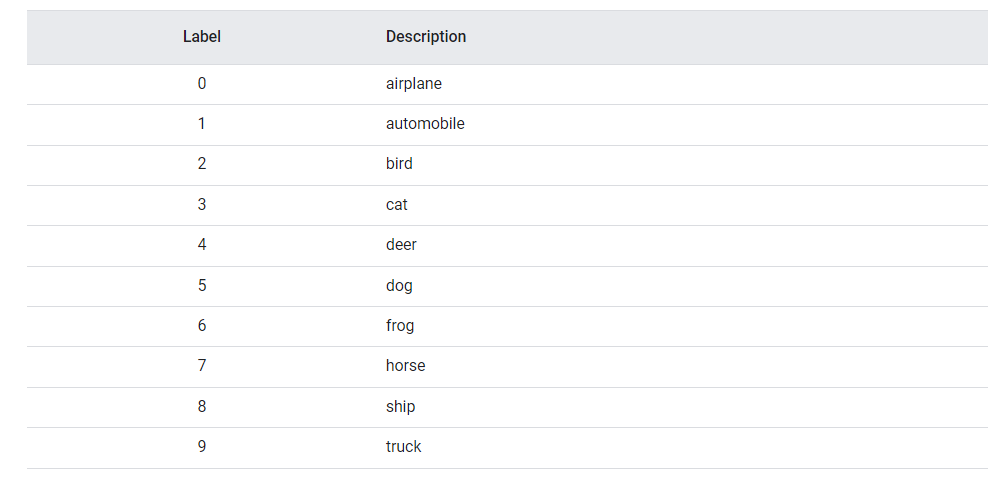

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

#cnn_model.summary()

In [33]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: For optimization our main goal is to decrease the number of training steps and converge to the local minima for loss as fast as possible. In ordinary Stochastic Gradient descent the model is
        trained by taking a subset of input data at a time. This leads to a zig-zag shaped path to the local minima which is not very efficient. We use optimizers such as Adam in order to reduce this 
        zig-zag nature
        Adam stands for Adaptive momentum optimization and its a stochastic gradient optimization method that combines the method of momentum(exponentially weighted moving average) and RMSprop (Root Mean Squared propagation) to achieve a more
        efficient path to the local minimum. 
        Momentum optimization is a method where gradient is taken as the weighted mean of current gradient and previous gradient and current gradient. This allows
        a less 'zig-zag', smoother path to the local minima.Beacuse the components perpendicular to the ideal pathway cancel each other(partially). Whereas in RMSprop , the exponential average of the
        square of the gradient is computed and update step gradient is divided by the square root of this exponential average. This ensures that large steps are not taken because if the gradient with 
        respect to a weight is high then the learning step is lesser. 
        So in Adam our learning step is the exponentially weighted moving average of the gradient divided by the exponential average of the square of the gradient. This method is more efficient than
        any of Momentum or RMSprop. 

        
"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer: For optimization our main goal is to decrease the number of training steps and converge to the local minima for loss as fast as possible. In ordinary Stochastic Gradient descent the model is\n        trained by taking a subset of input data at a time. This leads to a zig-zag shaped path to the local minima which is not very efficient. We use optimizers such as Adam in order to reduce this \n        zig-zag nature\n        Adam stands for Adaptive momentum optimization and its a stochastic gradient optimization method that combines the method of momentum(exponentially weighted moving average) and RMSprop (Root Mean Squared propagation) to achieve a more\n        efficient path to the local minimum. \n        Momentum optimization is a method where gradient is taken as the weighted mean of current gradient and previous gradient and current gradient. This allows\n        a less 'zig-zag', s

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [34]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 39s 43ms/step - loss: 3.1657 - accuracy: 0.1901 - val_loss: 1.9804 - val_accuracy: 0.2440
Epoch 2/10
875/875 [==============================] - 36s 42ms/step - loss: 1.8960 - accuracy: 0.2843 - val_loss: 1.8495 - val_accuracy: 0.3057
Epoch 3/10
875/875 [==============================] - 36s 41ms/step - loss: 1.7794 - accuracy: 0.3360 - val_loss: 1.7653 - val_accuracy: 0.3263
Epoch 4/10
875/875 [==============================] - 36s 42ms/step - loss: 1.7001 - accuracy: 0.3724 - val_loss: 1.7178 - val_accuracy: 0.3651
Epoch 5/10
875/875 [==============================] - 36s 42ms/step - loss: 1.6401 - accuracy: 0.3996 - val_loss: 1.7346 - val_accuracy: 0.3719
Epoch 6/10
875/875 [==============================] - 37s 42ms/step - loss: 1.5980 - accuracy: 0.4182 - val_loss: 1.6498 - val_accuracy: 0.4083
Epoch 7/10
875/875 [==============================] - 38s 43ms/step - loss: 1.5485 - accuracy: 0.4425 - val_loss: 1.6478 - val_accuracy: 0.3964
Epo

In [35]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is the measure of correctness of our model. It is the accuracy at which the model has given predictions for unseen data (validation data) . It is an important factor to
        consider while judging the model. Because a model could be overfit over the training data and give high train accuracy while a much lower validation accuracy. This would indicate overfitting ,
        ie the model is only fit for training data but for general input it does not prefom equally well.
        Although loss is decreasing over the epochs, it is clear that the validation accuracy is not increasing but actually fluctuating around a fixed value and infact so is train accuracy. This
        indicates a 
"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: Validation accuracy is the measure of correctness of our model. It is the accuracy at which the model has given predictions for unseen data (validation data) . It is an important factor to\n        consider while judging the model. Because a model could be overfit over the training data and give high train accuracy while a much lower validation accuracy. This would indicate overfitting ,\n        ie the model is only fit for training data but for general input it does not prefom equally well.\n        Although loss is decreasing over the epochs, it is clear that the validation accuracy is not increasing but actually fluctuating around a fixed value and infact so is train accuracy. This\n        indicates a \n'

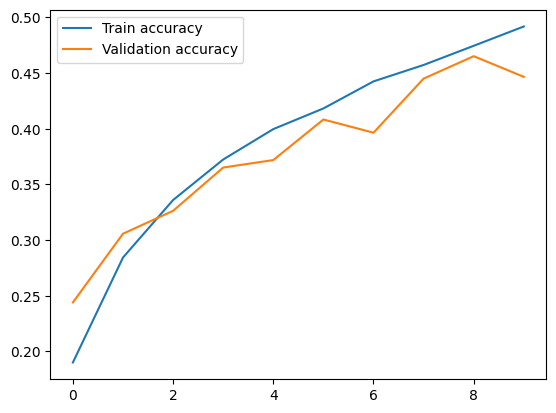

In [36]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [37]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [38]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [40]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 35s 39ms/step - loss: 2.1383 - accuracy: 0.2929 - val_loss: 1.7070 - val_accuracy: 0.3719
Epoch 2/20
875/875 [==============================] - 34s 39ms/step - loss: 1.6275 - accuracy: 0.4131 - val_loss: 1.6093 - val_accuracy: 0.4187
Epoch 3/20
875/875 [==============================] - 30s 35ms/step - loss: 1.5095 - accuracy: 0.4560 - val_loss: 1.6051 - val_accuracy: 0.4391
Epoch 4/20
875/875 [==============================] - 31s 36ms/step - loss: 1.4210 - accuracy: 0.4898 - val_loss: 1.4586 - val_accuracy: 0.4754
Epoch 5/20
875/875 [==============================] - 34s 38ms/step - loss: 1.3591 - accuracy: 0.5173 - val_loss: 1.5142 - val_accuracy: 0.4643
Epoch 6/20
875/875 [==============================] - 31s 35ms/step - loss: 1.3049 - accuracy: 0.5393 - val_loss: 1.4444 - val_accuracy: 0.5010
Epoch 7/20
875/875 [==============================] - 32s 37ms/step - loss: 1.2528 - accuracy: 0.5546 - val_loss: 1.4133 - val_accuracy:

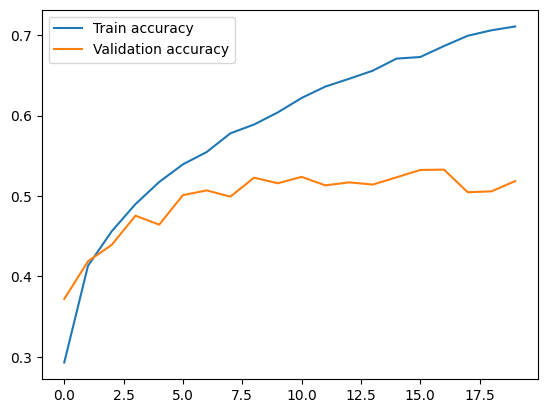

In [65]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Overfitting and underfitting are two extremes of the solution to a regression problem. Underfitting means the model is too simple to fit well with the input data. It is not able to extract a
        lot of information from the data. It could occur due to insufficient number of parametres or wrong assumptions about the data. Basically the model is too simple to recognize relation between input
        and output. In such a case it is advised to run the training for more epochs or increase the input data.
        Overfitting is when the model is overtrained on the train values with a high train accuracy but gives lower accuracy on validation data. In this scenario the model is too complex for the given data.
        It is like memorizing train data and failing to perfom well on unseen data. It is indicated by a large gap between train accuracy and validation accuracy.In such a case it is advisable to increase 
        the training data or to decrease the number of epochs (early stop) . 
        Best fit model is a generally a sweet spot between an overfit model and a underfit model, where the model has trained just enough to give a good accuracy without getting over-accustomed to the 
        training data.



Sources :
        https://towardsdatascience.com/overfitting-and-underfitting-principles-ea8964d9c45c#:~:text=Underfitting%20means%20that%20your%20model,val%2Ftest%20error%20is%20large.
        ibm.com/topics/underfitting#:~:text=of%20the%20model.-,Increase%20the%20duration%20of%20training,overtraining%2C%20and%20subsequently%2C%20overfitting.

"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization is a technique to prevent overfitting in a machine learning model. It is used to prevent the model form overtraining on the training dataset and be generalized so that it 
        can perform equally well for unseen data.It works by adding extra information. It is usually applied when there is shortage of training data. There are two types of regularization techniques:

        • Ridge Regression
        In this method a small amount of bias called ridge regression penalty is introduced in the loss function. This bias is directly proportional to the square of the weights of the model.
        This ensures that the weight values are small making the model less prone to overfitting and giving more fair contribution to all the weights.

        •	Lasso Regression
        In this method a penalty proportional to the absolute value of the weights is added to the cost function. This helps to eliminate the features that have do not have relevant contribution to the
        model.This helps to reduce overfitting because weights are reduced according to their relevance to the prediction of the output.




Sources : 
          https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/
"""

In [47]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: A dropout layer randomly sets a fraction of neuron inputs in the layer are set to zero while scaling the other neurons. This helps to prevent overtraining of the model and makes it more 
        generalized. It takes input the parametre 'rate' ( a number between 0 and 1 ) such that a fraction equal to 'rate' of neurons are set to zero. The activation of the other neurons is 
        then scaled by 1/(1-rate). As a result the model is trained more sensitively with respect to the neurons with non-zero inputs. So randomness in the model is increased and it does not overtrain 
        to the train data. It can be said that every neuron does not get trained over the entire dataset but just a part of it. And this part is different for each neuron. This generalizes the model.




Sources:
        https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab
        https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
"""

"\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: A dropout layer randomly sets a fraction of neuron inputs in the layer are set to zero while scaling the other neurons. This helps to prevent overtraining of the model and makes it more \n        generalized. It takes input the parametre 'rate' ( a number between 0 and 1 ) such that a fraction equal to 'rate' of neurons are set to zero. The activation of the other neurons is \n        then scaled by 1/(1-rate). As a result the model is trained more sensitively with respect to the neurons with non-zero inputs. So randomness in the model is increased and it does not overtrain \n        to the train data. It can be said that every neuron does not get trained over the entire dataset but just a part of it. And this part is different for each neuron. This generalizes the model.\n\n\n\n\nSources:\n        https://towardsdatascience.com/machine-learning-part-20-dropout-keras-lay

In [48]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: L1 normalization is a technique where vectors are normalized by dividing them by sum of absolute values of the componenets.
        suppose we have a vector x = [x1,x2,x3 ..... xn] then normalized xi are given by:
        normalized_xi = xi / (|x1| + |x2| + ... + |xn|)
"""

'\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

In [49]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: L2 normalization is a technique where vectors are normalized by dividing them with their norm.
        suppose we have a vector x = [x1,x2,x3 ..... xn] then normalized xi are given by:
        normalized_xi = xi / sqrt(x1^2 + x2^2 + ... + xn^2)

        This technique is useful for normalizing data before feeding it into neural network as it can help improve their preformance. 
"""

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

In [50]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentaion is a technique that is used to create more training data in machin learning. It bascially involves refining of the training data to make it more informative and ensure 
        that overfitting of the model does not take place. Data augmentation is required to boost the accuracy of the model, increase training data and prevent overfitting of the model.
        Data augmentation can be of many types, for example , Audio Data Augmentation (noise injection,shifting,changing the speed , changing the pitch) , Text Data Augmentation(shurffling,
        replacement, random word insertion/deletion)  , Image Augmentation(kernel filters , mixing images , random erasing etc). Data augmentation can be used to generate new data points in 
        from the given train set , in order to expand it. 
        Application of data augmentations are models for object detection, image classification, image recognition, natural language understanding, semantic segmentation etc where it helps to increase
        accuracy and reduce overfitting.






Sources:
        https://www.v7labs.com/blog/data-augmentation-guide
        https://www.datacamp.com/tutorial/complete-guide-data-augmentation
"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: \n\n\n\nSources:\n        https://www.v7labs.com/blog/data-augmentation-guide\n        https://www.datacamp.com/tutorial/complete-guide-data-augmentation\n'

####**Did you take note of the change in the cell at the start of these subjective questions ?**

In [51]:
"ANS(Yes/No):  Yes  "

'ANS(Yes/No):  Yes  '

'ANS(Yes/No):  Yes  '